# cf-python for DSG

https://ncas-cms.github.io/cf-python/tutorial.html#discrete-sampling-geometries

In [4]:
import cf
import cfplot

In [5]:
f = cf.read("ghcn-dsg.nc")
f

[<CF Field: precipitation_flux(cf_role=timeseries_id(20), ncdim%timeseries_1(36170)) mm>,
 <CF Field: snow_amount(cf_role=timeseries_id(20), ncdim%timeseries_1(36170)) mm>,
 <CF Field: snow_depth(cf_role=timeseries_id(20), ncdim%timeseries_1(36170)) mm>,
 <CF Field: air_temperature(cf_role=timeseries_id(20), ncdim%timeseries_1(36170)) Celsius>,
 <CF Field: air_temperature(cf_role=timeseries_id(20), ncdim%timeseries_1(36170)) Celsius>]

In [6]:
list(f[1].data) # list stations, second field is the cf_role

[<CF Data(36170): [--, ..., --] mm>,
 <CF Data(36170): [--, ..., --] mm>,
 <CF Data(36170): [--, ..., --] mm>,
 <CF Data(36170): [--, ..., --] mm>,
 <CF Data(36170): [--, ..., --] mm>,
 <CF Data(36170): [--, ..., --] mm>,
 <CF Data(36170): [--, ..., --] mm>,
 <CF Data(36170): [--, ..., --] mm>,
 <CF Data(36170): [--, ..., --] mm>,
 <CF Data(36170): [--, ..., --] mm>,
 <CF Data(36170): [--, ..., --] mm>,
 <CF Data(36170): [--, ..., --] mm>,
 <CF Data(36170): [--, ..., --] mm>,
 <CF Data(36170): [--, ..., --] mm>,
 <CF Data(36170): [--, ..., --] mm>,
 <CF Data(36170): [--, ..., --] mm>,
 <CF Data(36170): [--, ..., --] mm>,
 <CF Data(36170): [--, ..., --] mm>,
 <CF Data(36170): [--, ..., --] mm>,
 <CF Data(36170): [0.0, ..., --] mm>]

In [7]:
temp = f[-1]
temp

<CF Field: air_temperature(cf_role=timeseries_id(20), ncdim%timeseries_1(36170)) Celsius>

add station_name to coordinates, needs to appear as auxiliary coordinate.

In [8]:
temp.dump()

-------------------------------------
Field: air_temperature (ncvar%tasmin)
-------------------------------------
Conventions = 'COARDS, CF-1.6, ACDD-1.3'
_FillValue = 9999.0
cdm_data_type = 'TimeSeries'
featureType = 'TimeSeries'
missing_value = 9999.0
standard_name = 'air_temperature'
units = 'Celsius'

Data(cf_role=timeseries_id(20), ncdim%timeseries_1(36170)) = [[--, ..., --]] Celsius

Domain Axis: cf_role=timeseries_id(20)
Domain Axis: ncdim%timeseries_1(36170)

Auxiliary coordinate: time
    _CoordinateAxisType = 'Time'
    axis = 'T'
    calendar = 'gregorian'
    long_name = 'time of measurement'
    standard_name = 'time'
    units = 'days since 1600-01-01 00:00:00'
    Data(cf_role=timeseries_id(20), ncdim%timeseries_1(36170)) = [[1912-09-01 00:00:00, ..., --]] gregorian

Auxiliary coordinate: latitude
    _CoordinateAxisType = 'Latitude'
    axis = 'Y'
    long_name = 'station latitude'
    standard_name = 'latitude'
    units = 'degrees_north'
    Data(cf_role=timeseries_id

/home/zequi/miniconda3/lib/python3.10/site-packages/numpy/ma/core.py:467: RuntimeWarning: invalid value encountered in cast
  fill_value = np.array(fill_value, copy=False, dtype=ndtype)


There is only one Time coordinate axis that is 2D.

In [9]:
temp.coordinate('T')

<CF AuxiliaryCoordinate: time(20, 36170) days since 1600-01-01 00:00:00 gregorian>

In [10]:
temp.domain_axis('X')

<CF DomainAxis: size(20)>

In [11]:
temp.collapse('ncdim%timeseries_1: maximum')
# temp.collapse('T: maximum')

<CF Field: air_temperature(cf_role=timeseries_id(20), ncdim%timeseries_1(1)) Celsius>

In [12]:
temp.collapse('ncdim%timeseries: maximum')

<CF Field: air_temperature(ncdim%timeseries(1), ncdim%timeseries_1(36170)) Celsius>

In [13]:
temp.collapse('cf_role=timeseries_id: maximum')

<CF Field: air_temperature(ncdim%timeseries(1), ncdim%timeseries_1(36170)) Celsius>

In [14]:
temp.collapse('ncdim%timeseries_1: maximum', group=cf.seasons())

ValueError: Dimension and/or auxiliary coordinates are required for a grouped collapse with a sequence of groups.

In [15]:
temp.data.get_count()

<CF Count: long_name=Number of Observations for this TimeSeries(20) >

In [16]:
temp.data.get_compression_type()

'ragged contiguous'

In [17]:
temp.coordinate('Y'), temp.coordinate('X'), temp.coordinate('T')

(<CF AuxiliaryCoordinate: latitude(20) degrees_north>,
 <CF AuxiliaryCoordinate: longitude(20) degrees_east>,
 <CF AuxiliaryCoordinate: time(20, 36170) days since 1600-01-01 00:00:00 gregorian>)

Warning: 
 lineplot error - passed field is not suitable for plotting as a line


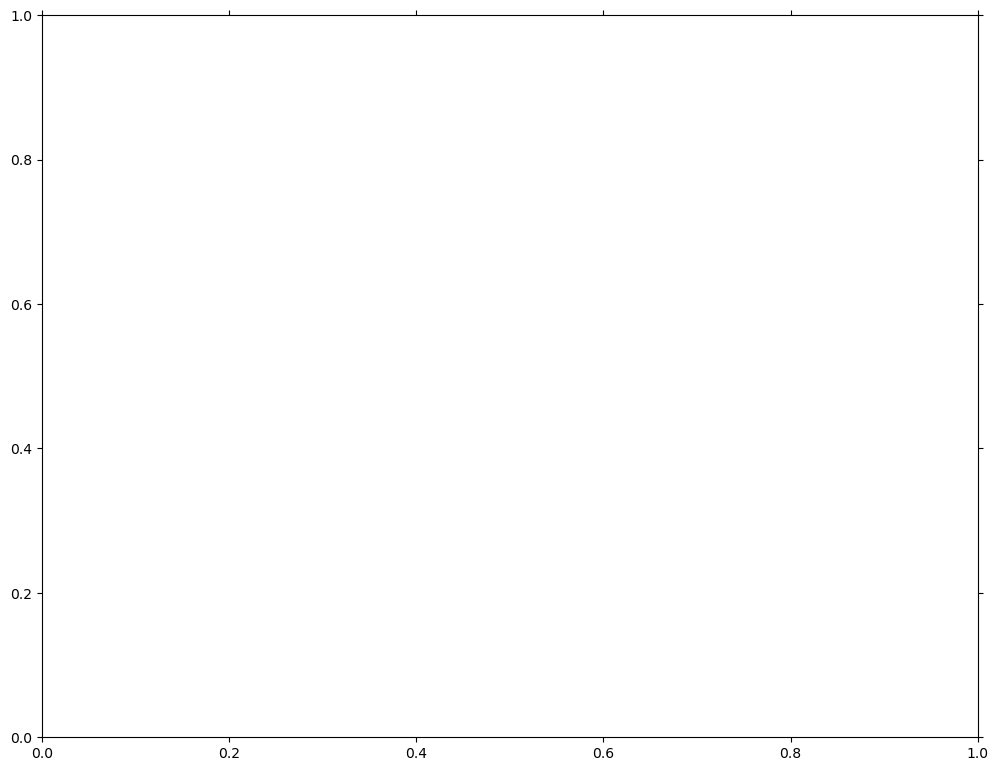

In [18]:
cfplot.lineplot(temp[0])

In [19]:
temp[0]

<CF Field: air_temperature(cf_role=timeseries_id(1), ncdim%timeseries_1(36170)) Celsius>

## Try bigger dataset

In [20]:
f = cf.read("ghcn-dsg1000.nc")
f

[<CF Field: precipitation_flux(cf_role=timeseries_id(1000), ncdim%timeseries_1(46939)) mm>,
 <CF Field: snow_amount(cf_role=timeseries_id(1000), ncdim%timeseries_1(46939)) mm>,
 <CF Field: snow_depth(cf_role=timeseries_id(1000), ncdim%timeseries_1(46939)) mm>,
 <CF Field: air_temperature(cf_role=timeseries_id(1000), ncdim%timeseries_1(46939)) Celsius>,
 <CF Field: air_temperature(cf_role=timeseries_id(1000), ncdim%timeseries_1(46939)) Celsius>]

In [21]:
pr = f[0]

In [22]:
%time pr.subspace(T=cf.dt('1996-01-20'))

CPU times: user 3min 51s, sys: 14.6 s, total: 4min 6s
Wall time: 4min 4s


<CF Field: precipitation_flux(cf_role=timeseries_id(413), ncdim%timeseries_1(404)) mm>

4min seems like a lot

In [24]:
%time max = pr.collapse('ncdim%timeseries_1: maximum')

CPU times: user 10.6 ms, sys: 0 ns, total: 10.6 ms
Wall time: 10.2 ms


In [27]:
max.data

<CF Data(1000, 1): [[866.0, ..., 1793.0]] mm>

In [28]:
list(max.data)

[<CF Data(1): [866.0] mm>,
 <CF Data(1): [3614.0] mm>,
 <CF Data(1): [1118.0] mm>,
 <CF Data(1): [1293.0] mm>,
 <CF Data(1): [2454.0] mm>,
 <CF Data(1): [1095.0] mm>,
 <CF Data(1): [1928.0] mm>,
 <CF Data(1): [1422.0] mm>,
 <CF Data(1): [3701.0] mm>,
 <CF Data(1): [3540.0] mm>,
 <CF Data(1): [1842.0] mm>,
 <CF Data(1): [986.0] mm>,
 <CF Data(1): [2200.0] mm>,
 <CF Data(1): [2372.0] mm>,
 <CF Data(1): [2154.0] mm>,
 <CF Data(1): [2080.0] mm>,
 <CF Data(1): [2088.0] mm>,
 <CF Data(1): [520.0] mm>,
 <CF Data(1): [1620.0] mm>,
 <CF Data(1): [3531.0] mm>,
 <CF Data(1): [180.0] mm>,
 <CF Data(1): [4059.0] mm>,
 <CF Data(1): [1768.0] mm>,
 <CF Data(1): [564.0] mm>,
 <CF Data(1): [878.0] mm>,
 <CF Data(1): [533.0] mm>,
 <CF Data(1): [1808.0] mm>,
 <CF Data(1): [840.0] mm>,
 <CF Data(1): [2692.0] mm>,
 <CF Data(1): [1194.0] mm>,
 <CF Data(1): [3378.0] mm>,
 <CF Data(1): [1846.0] mm>,
 <CF Data(1): [2500.0] mm>,
 <CF Data(1): [2403.0] mm>,
 <CF Data(1): [1092.0] mm>,
 <CF Data(1): [798.0] mm>,
 

This took 7 mins.

Unless you convert to a list it tricks you to think it is computed? Or what is going on?